In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# N: 데이터의 개수(샘플 수)
N = 20  # 총 20개의 데이터를 생성

# X: 입력 데이터(특성값, 독립변수)
# np.random.random(N): 0 이상 1 미만의 난수 20개 생성
# * 10: 0 이상 10 미만으로 스케일 확대
# - 5: -5 이상 5 미만으로 범위 이동
X = np.random.random(N) * 10 - 5

# Y: 출력 데이터(타겟값, 종속변수)
# 0.5 * X - 1: 선형 함수(기울기 0.5, 절편 -1)를 기반으로 예측값 생성
# np.random.randn(N): 평균 0, 표준편차 1인 정규분포를 따르는 잡음(noise) 추가
# → 실제 세상에서는 데이터에 항상 오차나 잡음이 있으므로 현실적인 데이터 흉내
Y = 0.5 * X - 1 + np.random.randn(N)


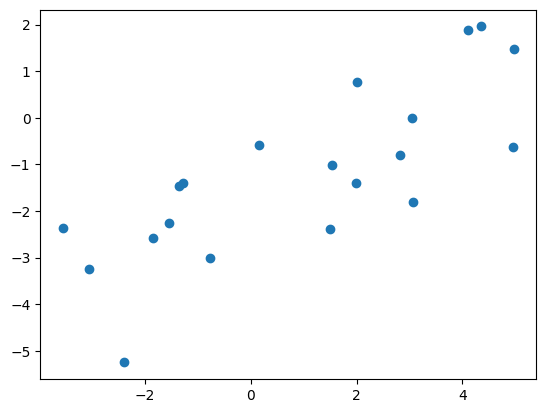

In [ ]:
plt.scatter(X, Y);

In [ ]:
model = nn.Linear(1, 1)
# 입력 1, 출력 1 => 선형 계층 (Linear layer)
# y = ax + b : (선형) 1차 함수를 학습할 수 있는 모델 생성 -> y = wx + b : weight, blas

# [설명] nn.Linear(입력 크기, 출력 크기)
# 여기서는 입력값 X가 1차원 (예: 하나의 숫자)이고,
# 예측하고자 하는 출력값 Y도 1차원이므로 (예: 하나의 숫자)
# nn.Linear(1, 1)은 아래와 같은 형태의 식을 학습할 수 있는 모델 생성

#      y = wx + b
#        └┬┘└┬┘
#          w   → 가중치 (weight): 입력을 얼마나 반영할지 결정
#          b   → 편향 (bias): 출력을 조정하는 상수값

In [ ]:
# 손실 함수(loss function) 정의
criterion = nn.MSELoss()

# MSELoss (Mean Squared Error Loss)
# → 평균 제곱 오차 손실 함수
# → 실제값(target)과 모델의 예측값(output)의 차이를 제곱해서 평균낸 값

# 예: 실제값 Y = 3, 예측값 = 2.5 → 손실 = (3 - 2.5)^2 = 0.25
# 예: 실제값 Y = 3, 예측값 = 4.0 → 손실 = (3 - 4)^2 = 1.0
# 목적: 이 오차(Loss)를 줄이도록 모델의 가중치(w, b)를 업데이트하는 것

# 옵티마이저(optimizer) 설정: 경사하강법(gradient descent) 방식
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# optimizer: 모델의 파라미터(가중치, 편향)를 어떻게 업데이트할지를 결정하는 도구

# torch.optim.SGD → SGD(Stochastic Gradient Descent, 확률적 경사하강법)
# model.parameters() → 모델 내부의 학습 가능한 파라미터들을 불러옴 (w와 b)
# lr=0.05 → 학습률(learning rate): 매 스텝마다 파라미터를 얼마나 크게 조정할지 정함

# 학습 과정:
# 1. 모델이 예측값을 만듦
# 2. 예측값과 정답값의 차이(Loss)를 계산
# 3. loss.backward()를 통해 각 파라미터에 대한 기울기(gradient)를 계산
# 4. optimizer.step()을 통해 그 기울기 방향으로 파라미터를 조금씩 조정함



In [ ]:
# X와 Y를 2차원 배열 (N행 1열) 형태로 변형함 → 모델 입력을 위해 차원을 맞춤
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# 넘파이 배열을 float32 타입으로 바꾸고, torch 텐서로 변환함
inputs = torch.from_numpy(X.astype(np.float32))   # 입력 데이터
targets = torch.from_numpy(Y.astype(np.float32))  # 정답(목표) 데이터

# 학습 반복 횟수 설정 (에폭 수)
n_epochs = 30

# 에폭별 손실값 저장용 리스트
losses = []

# 학습 루프 시작
for it in range(n_epochs):
  optimizer.zero_grad()           # 이전 단계에서 계산된 기울기(gradient) 초기화

  outputs = model(inputs)         # 모델에 입력값을 넣고 예측값 계산
  loss = criterion(outputs, targets)  # 예측값과 정답 사이의 오차 계산 (손실 함수)

  losses.append(loss.item())      # 손실값을 리스트에 저장 (그래프나 분석용)

  loss.backward()                 # 손실 함수 기준으로 모델의 각 파라미터에 대한 기울기 계산
  optimizer.step()                # 계산된 기울기를 이용해 파라미터 업데이트 (학습)

  # 현재 에폭 번호와 손실값 출력
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/30, Loss: 10.5950
Epoch 2/30, Loss: 4.4257
Epoch 3/30, Loss: 3.7501
Epoch 4/30, Loss: 3.3263
Epoch 5/30, Loss: 2.9779
Epoch 6/30, Loss: 2.6883
Epoch 7/30, Loss: 2.4473
Epoch 8/30, Loss: 2.2468
Epoch 9/30, Loss: 2.0801
Epoch 10/30, Loss: 1.9413
Epoch 11/30, Loss: 1.8259
Epoch 12/30, Loss: 1.7299
Epoch 13/30, Loss: 1.6500
Epoch 14/30, Loss: 1.5836
Epoch 15/30, Loss: 1.5283
Epoch 16/30, Loss: 1.4823
Epoch 17/30, Loss: 1.4441
Epoch 18/30, Loss: 1.4123
Epoch 19/30, Loss: 1.3858
Epoch 20/30, Loss: 1.3638
Epoch 21/30, Loss: 1.3454
Epoch 22/30, Loss: 1.3302
Epoch 23/30, Loss: 1.3175
Epoch 24/30, Loss: 1.3070
Epoch 25/30, Loss: 1.2982
Epoch 26/30, Loss: 1.2909
Epoch 27/30, Loss: 1.2848
Epoch 28/30, Loss: 1.2798
Epoch 29/30, Loss: 1.2756
Epoch 30/30, Loss: 1.2721


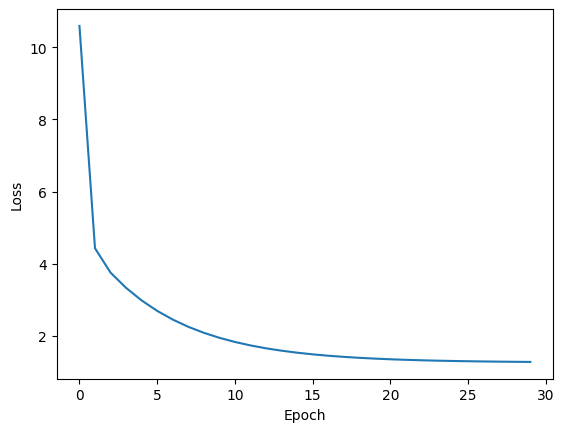

In [ ]:
# 에폭(epoch)에 따른 손실 값(loss) 그래프를 그려보자...

plt.plot(losses)  # losses 리스트를 y축으로 그래프 그림 (x축은 자동으로 0...30)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

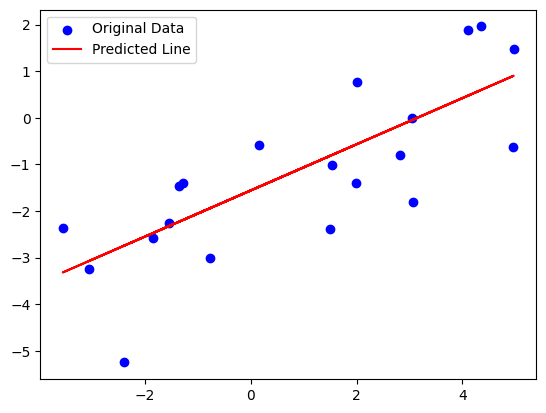

In [ ]:

plt.scatter(X, Y, color='blue', label='Original Data')  # 실제 데이터: 파란 점
predicted = model(inputs).detach().numpy()  # 학습된 모델로 예측 → numpy 배열로 변환
plt.plot(X, predicted, color='red', label='Predicted Line')  # 예측 직선: 빨간 선

plt.legend()
plt.show()


In [ ]:
# 모델의 가중치(weight) 값을 가져와 NumPy 배열로 변환
# model.weight → shape: [1, 1], 선형 계층의 W값 (기울기)
# .data → 파라미터의 원본 텐서에 접근 (gradient 정보 제외)
# .numpy() → 넘파이 배열로 변환하여 출력이나 추가 계산에 사용 가능
w = model.weight.data.numpy()

# 모델의 편향(bias) 값을 가져와 NumPy 배열로 변환
# model.bias → shape: [1], 선형 계층의 b값 (절편)
# .data → 파라미터의 원본 값에 접근
# .numpy() → 넘파이 배열로 변환
b = model.bias.data.numpy()

# 최종적으로 학습된 기울기(w)와 절편(b)를 출력
# 선형 함수 y = wx + b에서 w와 b에 해당
print(w, b)


[[0.49465978]] [-1.5578731]


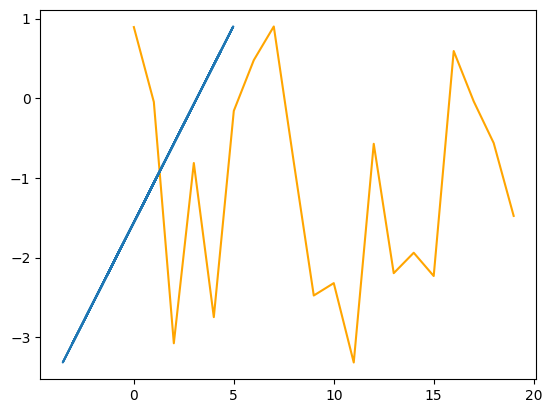

In [17]:
Y = w * X + b
plt.plot(Y, color='orange')

plt.plot(X, Y)